<a href="https://colab.research.google.com/github/LeoAlec/AnaliseEstatisticaML/blob/main/Qui2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

# Objetivo

Desejamos avaliar a associação entre o sexo do passageiro e sua probabilidade de sobrevivência. A ideia é se utilizar no dataset **Titanic** para uma futura análise mais profunda.
Até então isso seria só de uma aplicação de Qui Quadrado

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['sex'].unique()
df['survived'].unique()

array([0, 1])

In [ ]:
sex = {'male': 0, 'female': 1}
df['sex'] = df['sex'].replace(sex)

<ipython-input-4-a54f7769cda2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(sex)


Visto que não utilizaremos as variáveis 'deck' e 'age', não precisamos aplicar nenhum método de tratamento

---

# Teste

Qui-Quadrado de Independência:


`Sex` e `Survived`

$$$$

H0: As variáveis são independentes
H1: As variáveis são dependentes

`sex:`
- male: 0
- female: 1

`survived:`
- Negativo: 0
- Poisitvo: 1

## Passos:

1. Tabela de contingencia

2. Frequencias Esperadas

$$
E_{ij} = \frac{(T_{i\cdot}) (T_{\cdot j})}{T}
$$

3. Qui-Quadrado

$$
X^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

4. Graus de Liberdade

$$
\text{GL} = ( \text{n de linhas} - 1)( \text{n de colunas} - 1)
$$

5. Comparar com a distribuicao Qui-Quadrado

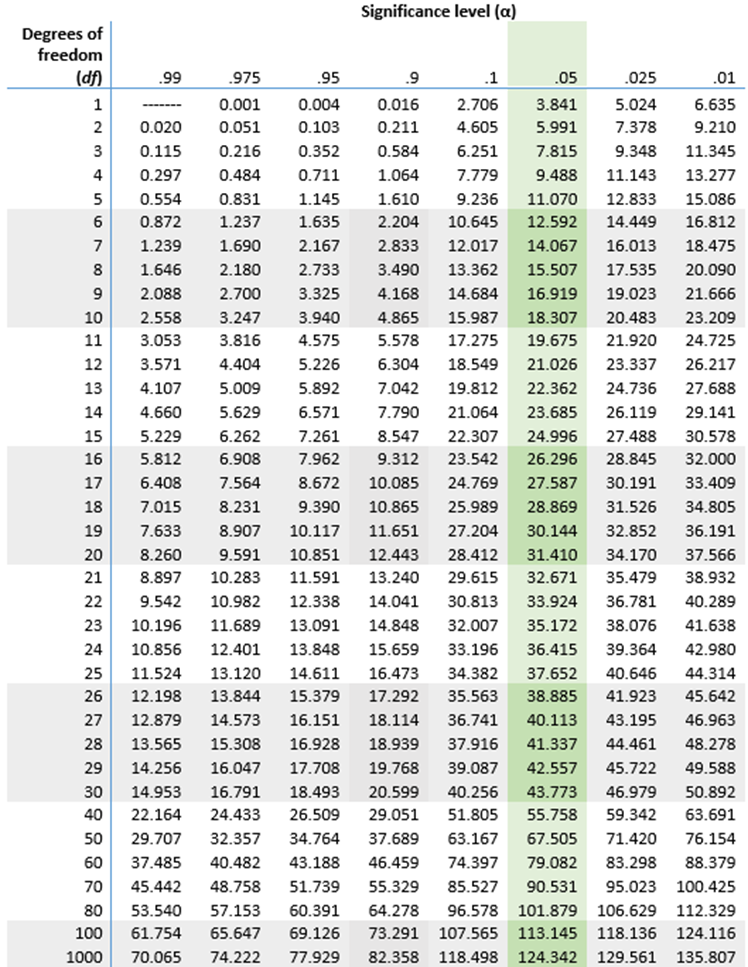

Valor critico: 3.841

In [ ]:
contingencia = pd.crosstab(df['sex'], df['survived'])

observado = contingencia.values
total_linha = observado.sum(axis=1).reshape(-1, 1)
total_coluna = observado.sum(axis=0).reshape(1, -1)
total = observado.sum()

esperado = total_linha @ total_coluna / total

qui2 = ((observado - esperado) ** 2 / esperado).sum()

n_linhas = len(contingencia)
n_col = len(contingencia.columns)
gl = (n_linhas - 1) * (n_col - 1)
print("Qui2: {}, GL: {}".format(qui2, gl))

Qui2: 263.05057407065567, GL: 1


5. Comparar com a distruibuicao Qui-quadrado

- Se $X^2$ > Valor critico, rejeitamos a hipotese nula

- Se $X^2$ <= Valor critico, nao rejeitamos a hipotese nula

---

# Resultado

$\alpha = 0.05$

$gl = 1$

$\chi^2_{\text{calc}} > \chi^2_{\text{crit}}$, ou seja, **rejeitamos a hipotese** nula. Em outras palavras, ha uma associacaoa significativa entre **o sexo do passageiro e sua probabilidade de sobrevivência**